# Example 01 - page 16 book

In [1]:
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
y = np.array([13,15,9,17,8,5,19,23,10,7,10,6]) # response variable

In [3]:
x1 = np.array([1,1,1,1,1,1,0,0,0,0,0,0]) # binary predictor

In [4]:
x2 = np.array([1,1,1,1,2,2,2,2,3,3,3,3]) # categorical predictor

In [5]:
my_data = {}
my_data['x1'] = x1
my_data['x2'] = x2

In [6]:
results = smf.ols(formula='y~x1+x2', data=my_data).fit()

In [7]:
print (str(results.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     14.51
Date:                Wed, 13 Sep 2017   Prob (F-statistic):            0.00153
Time:                        17:47:23   Log-Likelihood:                -28.579
No. Observations:                  12   AIC:                             63.16
Df Residuals:                       9   BIC:                             64.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8333      5.090      7.630      0.0

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [8]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)

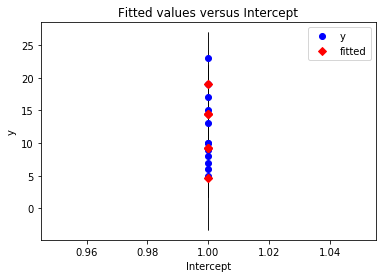

In [9]:
plt.show()

# Example 02 - page 41 book

In [10]:
import pymc3 as pm
import pandas as pd
import scipy.stats as ss

In [11]:
np.random.seed(1056)
n_obs = 250
alpha = 2.
beta = 3.
x1 = ss.uniform.rvs(size=n_obs)
xb = alpha + beta*x1
y = ss.norm.rvs(loc=xb, scale=1., size=n_obs)

In [12]:
my_dataframe = pd.DataFrame({'x1': x1, 'y': y})

In [14]:
with pm.Model() as model_glm:
    pm.glm.GLM.from_formula('y~x1', my_dataframe)
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 360.67:   8%|▊         | 16503/200000 [00:01<00:14, 12945.73it/s]
Convergence archived at 17100
Interrupted at 17,100 [8%]: Average Loss = 786.15
100%|██████████| 5500/5500 [00:05<00:00, 1044.55it/s]


In [16]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.038            0.128            0.003            [1.784, 2.276]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.788          1.951          2.039          2.125          2.281


x1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.139            0.219            0.005            [2.694, 3.536]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.711          2.991          3.138          3.286          3.562


sd:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

In [17]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ee2418d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4edc77fb10>]], dtype=object)

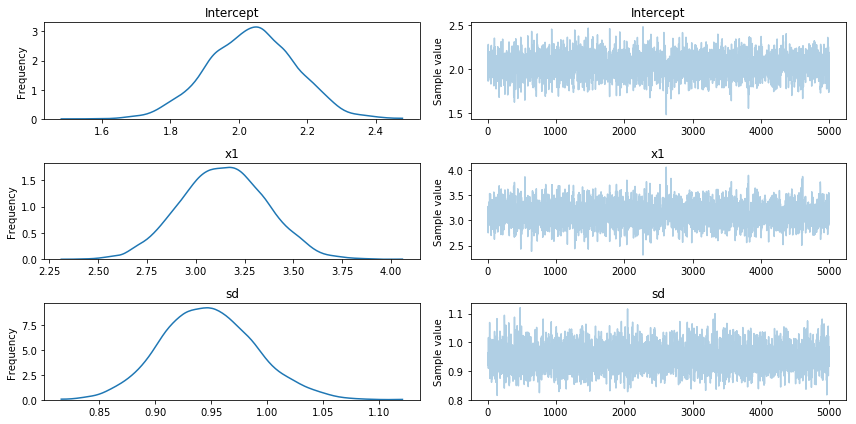

In [18]:
plt.show()